# Notebook Contents

1. Importing Libraries and Data
2. Cleaning Data
3. Prepping Data for Regression Analysis
4. Regression Analysis

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Ensuring that the graphs created display within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#Creating path
path =r'C:\Users\smflo\Documents\Gun Violence Analysis'

In [4]:
#Importing guns_clean.csv
df_guns = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','guns_clean_2.csv'), index_col = False)

# 2. Cleaning Data

In [5]:
#Checking column names
df_guns.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'incident_id', 'date', 'state',
       'city_or_county', 'n_killed', 'n_injured', 'congressional_district',
       'gun_type', 'incident_characteristics', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'mass_shooting'],
      dtype='object')

In [6]:
#Checking first 20 rows
df_guns.head(20)

,Unnamed: 0.1,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,mass_shooting
0,0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,1.0
1,1,1,460726,1/1/2013,California,Hawthorne,1,3,43.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1.0
2,2,2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,NaN
3,3,3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",1,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,NaN
4,4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,NaN
5,5,5,478948,1/7/2013,Oklahoma,Tulsa,4,0,1.0,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",1,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.0,11.0,1.0
6,6,6,479363,1/19/2013,New Mexico,Albuquerque,5,0,1.0,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",2,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0,1.0
7,7,7,479374,1/21/2013,Louisiana,New Orleans,0,5,2.0,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,1,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,93.0,5.0,1.0
8,8,8,479389,1/21/2013,California,Brentwood,0,4,9.0,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,1,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,11.0,7.0,1.0
9,9,9,492151,1/23/2013,Maryland,Baltimore,1,6,7.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,44.0,1.0


In [7]:
#Checking shape
df_guns.shape

(239677, 20)

In [10]:
#Checking for missing values
df_guns.isnull().sum()

Unnamed: 0.1                     0
Unnamed: 0                       0
incident_id                      0
date                             0
state                            0
city_or_county                   0
n_killed                         0
n_injured                        0
congressional_district       11944
gun_type                     99451
incident_characteristics         0
n_guns_involved                  0
participant_age              92298
participant_age_group        42119
participant_gender           36362
participant_status           27626
participant_type             24863
state_house_district         38772
state_senate_district        32335
mass_shooting               238040
dtype: int64

In [11]:
df_guns['mass_shooting'].fillna(0, inplace=True)

I will not being doing anything with the remaining missing values as I don't really need those columns for my analysis. I can't really impute a value for those cells anyway, and I don't want to delete them.

In [12]:
#Rechecking for missing values in 'mass_shooting' column
df_guns.isnull().sum()

Unnamed: 0.1                    0
Unnamed: 0                      0
incident_id                     0
date                            0
state                           0
city_or_county                  0
n_killed                        0
n_injured                       0
congressional_district      11944
gun_type                    99451
incident_characteristics        0
n_guns_involved                 0
participant_age             92298
participant_age_group       42119
participant_gender          36362
participant_status          27626
participant_type            24863
state_house_district        38772
state_senate_district       32335
mass_shooting                   0
dtype: int64

In [13]:
#Creating dataframe to check for duplicates
dups = df_guns.duplicated()

In [14]:
#Checking for duplicates
dups.shape

(239677,)

No duplicates found

<AxesSubplot:xlabel='n_killed', ylabel='Count'>

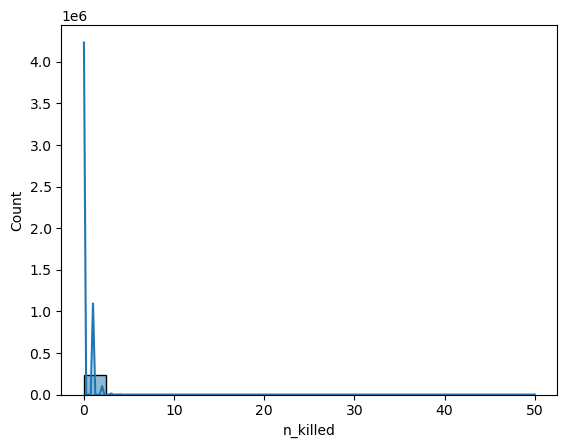

In [16]:
#Checking for extreme values 
sns.histplot(df_guns['n_killed'], bins=20, kde = True)

In [19]:
#Checking the mean
df_guns['n_killed'].mean()

0.25228953967214207

In [20]:
#Checking the median
df_guns['n_killed'].median()

0.0

In [21]:
#Checking the max
df_guns['n_killed'].max()

50

<AxesSubplot:xlabel='n_injured', ylabel='Count'>

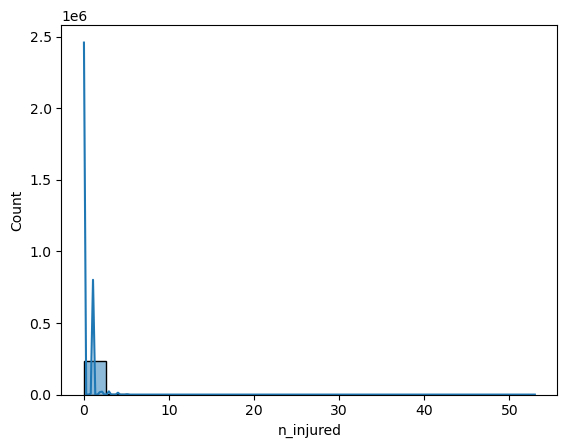

In [18]:
#Checking for extreme values 
sns.histplot(df_guns['n_injured'], bins=20, kde = True)

In [22]:
#Checking the mean
df_guns['n_injured'].mean()

0.4940065171042695

In [23]:
#Checking the median
df_guns['n_injured'].median()

0.0

In [24]:
#Checking the max
df_guns['n_injured'].max()

53

# 3. Prepping Data for Regression Analysis

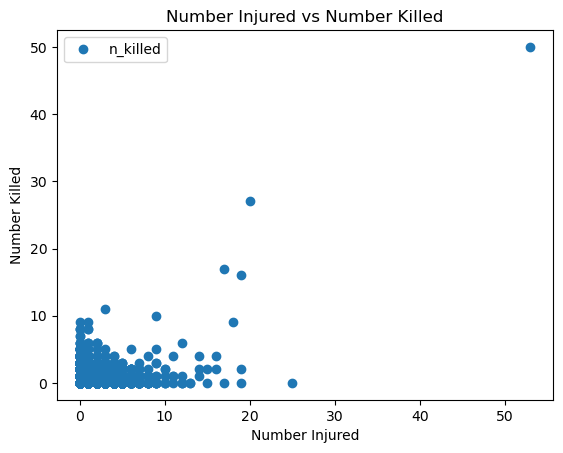

In [26]:
#Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df_guns.plot(x = 'n_injured', y='n_killed',style='o') 
plt.title('Number Injured vs Number Killed')  
plt.xlabel('Number Injured')  
plt.ylabel('Number Killed')  
plt.show()

Hypothesis: As the number of people injured increases, so does the number of people killed.

In [27]:
#Reshaping the variables into NumPy arrays and putting them into separate objects
X = df_guns['n_injured'].values.reshape(-1,1)
y = df_guns['n_injured'].values.reshape(-1,1)

In [28]:
X

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [29]:
y

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [30]:
#Splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [31]:
#Creating a regression object
regression = LinearRegression() 

In [32]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
#Predicting the values of y using X
y_predicted = regression.predict(X_test)

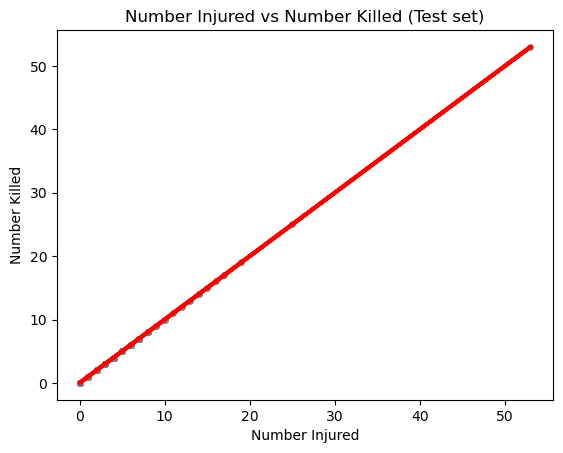

In [34]:
#Creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number Injured vs Number Killed (Test set)')
plot_test.xlabel('Number Injured')
plot_test.ylabel('Number Killed')
plot_test.show()

There is, what appears to be, a perfect linear relationship between the number of people injured and the number of people killed in a gun violence incident.

In [35]:
#Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) #Mean squared error
r2 = r2_score(y_test, y_predicted) #R2 score

In [36]:
#Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.]]
Mean squared error:  2.6031001129107786e-27
R2 score:  1.0


In [37]:
y_predicted

array([[ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       ...,
       [-3.33622019e-14],
       [ 1.00000000e+00],
       [ 1.00000000e+00]])

In [38]:
#Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.000000e+00
1,1,1.000000e+00
2,1,1.000000e+00
3,1,1.000000e+00
4,0,-3.336220e-14
5,0,-3.336220e-14
6,1,1.000000e+00
7,0,-3.336220e-14
8,0,-3.336220e-14
9,1,1.000000e+00


The summary statistics of the model confirm that the model is accurate. There is practically no variance between the actual and prdicted values. An R2 score of 1.0 indicates a perfect fit and the near-zero MSE also confirms this. The slope of 1 shows that as the number of people injured increases, the number of people killed also increases.

In [39]:
#Predicting X_train
y_predicted_train = regression.predict(X_train) 

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
#Print summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.]]
Mean squared error:  2.3542666174408163e-27
R2 score:  1.0


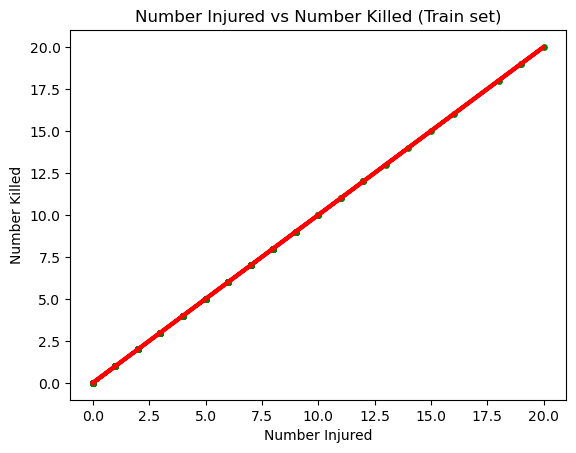

In [42]:
#Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number Injured vs Number Killed (Train set)')
plot_test.xlabel('Number Injured')
plot_test.ylabel('Number Killed')
plot_test.show()

The model's outcome on the training set is nearly identical to that on the test set. The MSE is practically 0 again and the slope and R2 score are both 1 again. This confirms that this a good model to use. 